In [119]:
import pandas as pd # biblioteca de análise de dados em Python

In [120]:

df = pd.read_csv('C:\\Users\\dsadm\\Desktop\\isa\\iabg\\Somativa\\dadosacoes.csv', sep=',') # estou usando a biblioteca pandas para ler o arquivo de dados e para ele ver o separamento eu uso o sep ',' 
#que cada virgula que ddiver ele ve como algo separado


In [121]:
df.head #  exibir as primeiras linhas de um DataFrame

<bound method NDFrame.head of    nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)
0      VALE3            194          45                            2134
1      SUZB3             91          71                            3069
2      SUZB3            165          41                            2815
3      SUZB3             56          34                            3613
4     GOOGLE            212           9                            2975
..       ...            ...         ...                             ...
95     SUZB3            208          78                            3035
96     VALE3            253          60                            3263
97    GOOGLE             99          35                             980
98     VALE3             82          43                            1866
99     VALE3            111          19                             230

[100 rows x 4 columns]>

In [122]:
colunas = {"nome ação":"Nome",
               "preço ação":"preco","qtde cotas":"Quantidade","valor de mercado":"Valor"} # estou criando um dicionario e mostrando para ele os nomes antigos das colunas e colocando um novo nome

In [123]:
df.rename(columns=colunas,inplace=True) # estou renomando as colunas com as que eu coloquei anteriormente

In [124]:
df.head()#  exibir as primeiras linhas de um DataFrame

,Nome,preço ação R$,Quantidade,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [125]:
import numpy as np # para poder usar matrizes e arrays multidimencionais
import seaborn as sns #para poder vizualizar dados e criar graficos 
import pandas as pd # analisa os dados e faz dados flexiveis
import matplotlib.pyplot as plt # faz vizualizações de dados e cria graficos tambem  
from sklearn.cluster import KMeans # faz o aprendizado de máquina em Python 
from mpl_toolkits.mplot3d import Axes3D # cria gráficos tridimensionais no Matplotlib.

<Axes: title={'center': 'Nome de ação x Preço da ação'}, xlabel='Nome', ylabel='preço ação R$'>

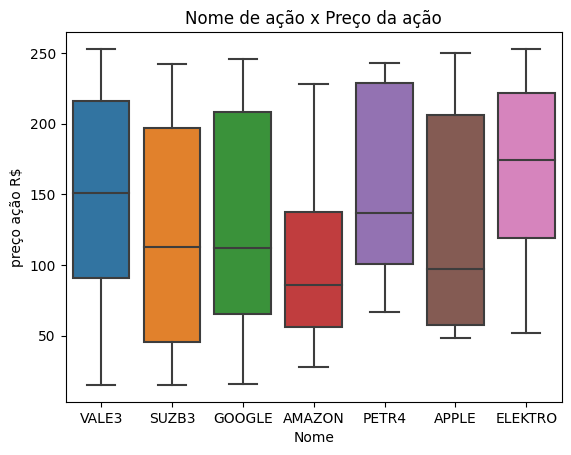

In [126]:
# cria um boxplot usando as bibliotecas Matplotlib  e Seaborn 
# Define o título do gráfico
plt.title("Nome de ação x Preço da ação")
# Cria um boxplot usando Seaborn
# - 'x=df['Nome']': Coluna 'Nome' será usada no eixo x (horizontal)
# - 'y=df['preço ação R$']': Coluna 'preço ação R$' será usada no eixo y (vertical)
sns.boxplot(x=df['Nome'], y=df['preço ação R$'])


In [127]:
# Exibe informações detalhadas sobre o DataFrame
df.info

<bound method DataFrame.info of       Nome  preço ação R$  Quantidade  valor de mercado R$ -(Bilhões)
0    VALE3            194          45                            2134
1    SUZB3             91          71                            3069
2    SUZB3            165          41                            2815
3    SUZB3             56          34                            3613
4   GOOGLE            212           9                            2975
..     ...            ...         ...                             ...
95   SUZB3            208          78                            3035
96   VALE3            253          60                            3263
97  GOOGLE             99          35                             980
98   VALE3             82          43                            1866
99   VALE3            111          19                             230

[100 rows x 4 columns]>

In [128]:
# Exibe estatísticas descritivas resumidas do DataFrame
df.describe

<bound method NDFrame.describe of       Nome  preço ação R$  Quantidade  valor de mercado R$ -(Bilhões)
0    VALE3            194          45                            2134
1    SUZB3             91          71                            3069
2    SUZB3            165          41                            2815
3    SUZB3             56          34                            3613
4   GOOGLE            212           9                            2975
..     ...            ...         ...                             ...
95   SUZB3            208          78                            3035
96   VALE3            253          60                            3263
97  GOOGLE             99          35                             980
98   VALE3             82          43                            1866
99   VALE3            111          19                             230

[100 rows x 4 columns]>

In [129]:
dados = df #estou passando meus dados df paa a variavel dados

In [130]:
dados # printando os dados

,Nome,preço ação R$,Quantidade,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [131]:
# Realiza one-hot encoding na coluna 'Nome' do DataFrame 'dados'
# e cria um novo DataFrame chamado 'dados_ativos'
#aqui estou passando meu nome para poder usar com numeros tranfromando ela 
dados_ativos = pd.get_dummies(dados,columns=['Nome'],drop_first=True)


In [132]:
kmeans = KMeans(n_clusters=4) # aplicando kmeans com 4 clusters
kmeans.fit(dados_ativos) # aqui eu faço essa divição no  meus dados ativos

c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [133]:
sse = kmeans.inertia_
print(sse)

12976258.303774929


In [134]:
labels = kmeans.labels_ # Obtém os rótulos (labels) atribuídos a cada ponto de dados pelo algoritmo de clustering (KMeans)
# Obtém as coordenadas dos centroides dos clusters
centroids = kmeans.cluster_centers_  

Text(0, 0.5, 'preço ação R$')

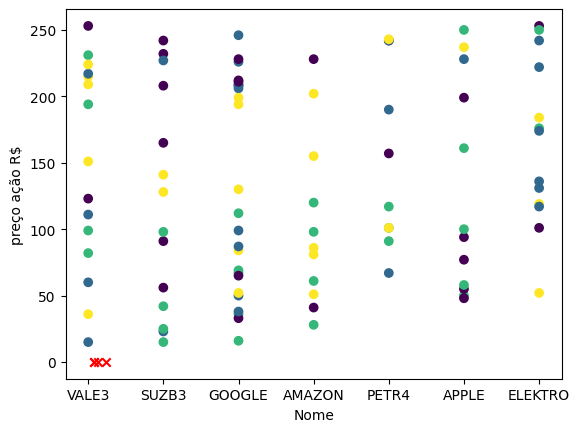

In [135]:
plt.scatter(dados['Nome'],dados['preço ação R$'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome") # o x vai ser o nome 
plt.ylabel("preço ação R$") # e o eixo y vai indicar os preço

Text(0, 0.5, 'Quantidade')

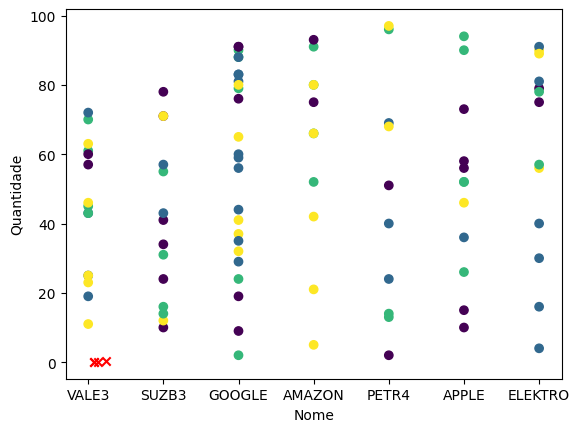

In [136]:
plt.scatter(dados['Nome'],dados['Quantidade'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome")
plt.ylabel("Quantidade")

Text(0, 0.5, 'valor de mercado R$ -(Bilhões)')

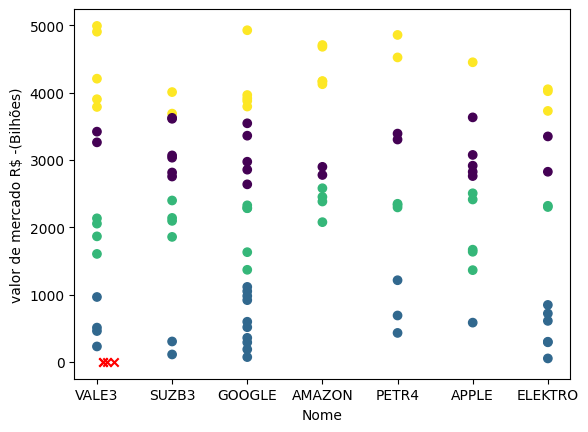

In [137]:
plt.scatter(dados['Nome'],dados['valor de mercado R$ -(Bilhões)'], c= labels) # plota  o gráfico com a visualização dos clusters
plt.scatter(centroids[:, 4], centroids[:, 4], marker='x', color='red') 
# : indica o começo  e 4 até qual linha vai

plt.xlabel("Nome")
plt.ylabel("valor de mercado R$ -(Bilhões)")

In [138]:
# Realiza one-hot encoding na coluna 'Nome' do DataFrame 'dados'
# e cria um novo DataFrame chamado 'data'
data = pd.get_dummies(dados, columns=['Nome'], drop_first=True)
# Seleciona todas as  colunas relevantes como features para o modelo de clustering KMeans juntando elas 
features = data[['preço ação R$', 'Quantidade', 'valor de mercado R$ -(Bilhões)']]
# Inicializa e ajusta um modelo de KMeans com 4 clusters usando as features selecionadas
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)

c:\Users\dsadm\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [139]:
# Adiciona uma nova coluna chamada 'Cluster' ao DataFrame 'data' e atribui os rótulos (labels) dos clusters
data['Cluster'] = kmeans.labels_
#A essa nova coluna são atribuídos os rótulos dos clusters, indicando a que cluster cada linha (ponto de dado) do DataFrame data foi atribuída.

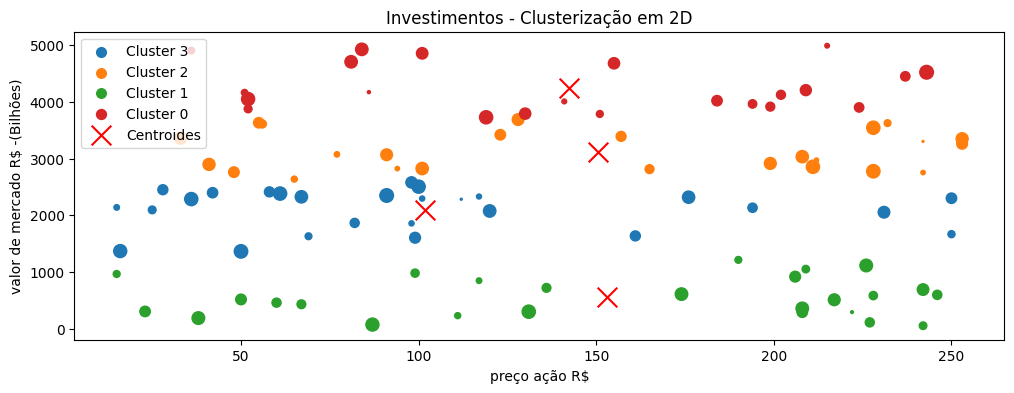

In [143]:
# Importa a biblioteca Matplotlib para criar visualizações
import matplotlib.pyplot as plt

# Define o tamanho da figura para a visualização
plt.figure(figsize=(12, 4))

# Scatter plot dos pontos do cluster
# Itera sobre os clusters únicos e plota os pontos de cada cluster no gráfico
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['preço ação R$'], cluster_data['valor de mercado R$ -(Bilhões)'], cluster_data['Quantidade'],
                label=f'Cluster {cluster}')

# Scatter plot dos centroides
# Plota os centroides dos clusters como marcadores 'x' na cor vermelha
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', color='red', s=200, label='Centroides')
# Adiciona rótulos aos eixos x e y
plt.xlabel('preço ação R$')
plt.ylabel('valor de mercado R$ -(Bilhões)')

# Adiciona um título ao gráfico
plt.title('Investimentos - Clusterização em 2D')
# Adiciona uma legenda ao gráfico
plt.legend()
# Exibe o gráfico
plt.show()


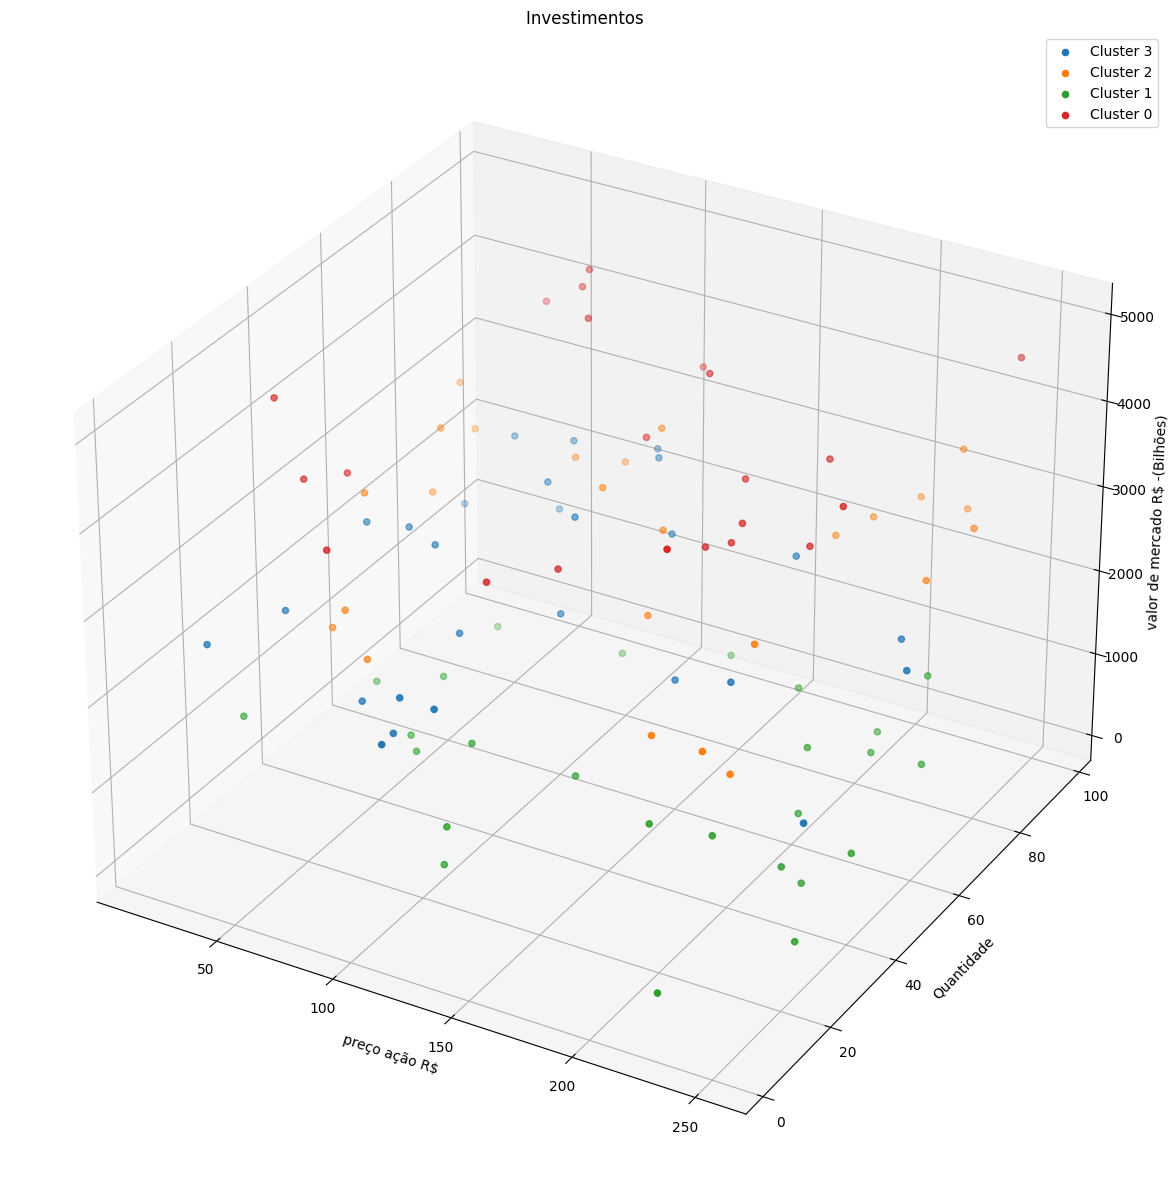

         preço ação R$  Quantidade  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         Nome_APPLE  Nome_ELEKTRO  Nome_GOOGLE  Nome_PETR4  Nome_SUZB3  \
Cluster                                                                  
0          0.045455      0.136364     0.227273    0.090909    0.045455   
1          0.038462      0.230769     0.384615    0.115385    0.076923   
2          0.200000      0.080000     0.200000    0.080000    0.280000   
3          0.185185      0.074074     0.185185    0.111111    0.148148   

         Nome_VALE3  
Cluster              
0          0.227273  
1          0.153846  
2          0.080000  
3          0.148148  


In [141]:
# Define uma figura tridimensional (3D) com o tamanho especificado
fig = plt.figure(figsize=(15,15))
# Adiciona um subplot tridimensional à figura
ax = fig.add_subplot(111, projection='3d')
# Loop sobre os clusters únicos e plota os pontos tridimensionais de cada cluster

for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['Quantidade'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')
# Adiciona rótulos aos eixos x, y e z
ax.set_xlabel('preço ação R$')
ax.set_ylabel('Quantidade')
ax.set_zlabel('valor de mercado R$ -(Bilhões) ')
# Adiciona um título à visualização 3D
ax.set_title(f'Investimentos ')
# Adiciona uma legenda ao gráfico
plt.legend()
# Exibe o gráfico
plt.show()

# Analisar os clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

In [145]:
print("RESPOSTA QUESTÃO 5")
print("A maior vantagem do aprendizado não supervisionado em relação ao supervisionado é a capacidade de descobrir padrões, estruturas e insights nos dados sem depender de rótulos predefinidos. \nIsso é especialmente útil quando os dados não têm categorias conhecidas, permitindo a exploração flexível e a descoberta de informações ocultas nos conjuntos de dados.")

RESPOSTA QUESTÃO 5
A maior vantagem do aprendizado não supervisionado em relação ao supervisionado é a capacidade de descobrir padrões, estruturas e insights nos dados sem depender de rótulos predefinidos. 
Isso é especialmente útil quando os dados não têm categorias conhecidas, permitindo a exploração flexível e a descoberta de informações ocultas nos conjuntos de dados.


In [ ]:
# foi obeservado que quando menor o valor melhor a qualidade nesse caso seria o com 5 cluster 